# Pandas Basics <hr style="border:2.5px solid #123456"></hr>

Data Analyst: Jaymark S. Arlante <br>
Department: Electrical Engineering

In [143]:
# import and packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# DataFrame

In [144]:
data = {
    "name":['kramyaJ','marki','jayjay'],
    "age":[18, 17, 16],
    "sex":['M', 'M', 'M']
}
data

{'name': ['kramyaJ', 'marki', 'jayjay'],
 'age': [18, 17, 16],
 'sex': ['M', 'M', 'M']}

In [145]:
df = pd.DataFrame(data)
df

,name,age,sex
0,kramyaJ,18,M
1,marki,17,M
2,jayjay,16,M


In [146]:
df['age']

0    18
1    17
2    16
Name: age, dtype: int64

In [147]:
df['age'].sum()

51

In [148]:
df['age'].mean()

17.0

In [149]:
df['name']

0    kramyaJ
1      marki
2     jayjay
Name: name, dtype: object

In [150]:
df['sex']

0    M
1    M
2    M
Name: sex, dtype: object

# Correlation

In [151]:
measurement = {
    "current":[2, 3.5, 1.8, 4.2, 2.7],
    "power":[100, 200, 90, 210, 110]
}
measurement

{'current': [2, 3.5, 1.8, 4.2, 2.7], 'power': [100, 200, 90, 210, 110]}

In [152]:
device = pd.DataFrame(measurement)
device

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [153]:
device.cov()

,current,power
current,1.023,56.15
power,56.150,3370.00


In [154]:
device.corr()

,current,power
current,1.000000,0.956306
power,0.956306,1.000000


In [155]:
device.describe()

,current,power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


## Scatter plot

In [156]:
device['current']

0    2.0
1    3.5
2    1.8
3    4.2
4    2.7
Name: current, dtype: float64

In [157]:
device['power']

0    100
1    200
2     90
3    210
4    110
Name: power, dtype: int64

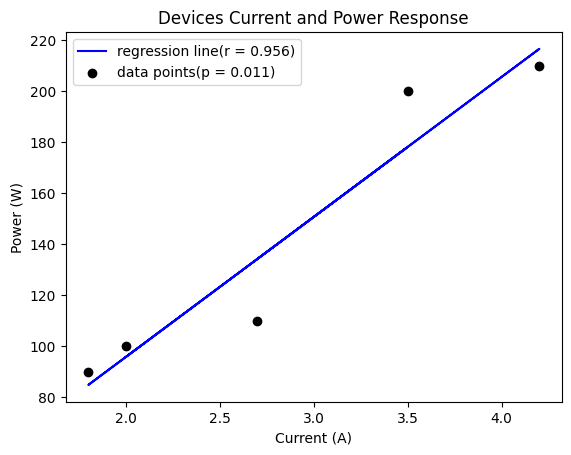

In [158]:
x = device['current']
y = device['power']

# regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x + intercept

plt.plot(x,line,
         color='b',
         label=f'regression line(r = {r_value:.3f})')

# scatter
plt.scatter(x,y,
        color='black',
         label=f'data points(p = {p_value:.3f})')
plt.title('Devices Current and Power Response')
plt.xlabel('Current (A)')
plt.ylabel('Power (W)')
plt.legend()
plt.show()

# Resistance Test

In [159]:
resistance = pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [160]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


In [161]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

9.399999999999999

In [162]:
pan_mean = resistance['Panther'].mean()
pan_mean

10.75

In [163]:
resistance['Panther'].fillna(pan_mean)

0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [164]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)

# Bar Graph

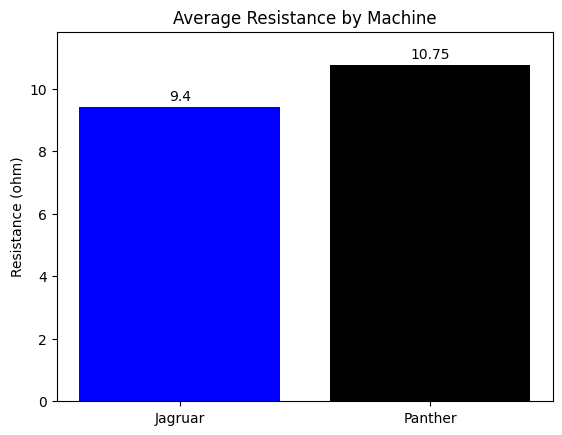

In [165]:
bars = plt.bar(['Jagruar','Panther'],[jag_mean,pan_mean],
        color=['blue','black'])
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohm)')

# bar label
plt.bar_label(bars, padding=3)
plt.margins(y=0.1) # 10
plt.show()